In [1]:
%matplotlib inline
import pandas as pd
import datetime
import ast
import tldextract

/home/rgalbo/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# If you want access to this data ping @bstarling on slack. I have it stored in s3
# 150mb / 240k rows
df = pd.read_csv('breitbart_clean.csv', sep='\t', parse_dates=['date'])

OSError: File b'breitbart_clean.csv' does not exist

In [4]:
df.set_index('date', inplace=True)
df.count()

author      241677
title       241677
lead        241677
category    241677
hrefs       241677
dtype: int64

### Articles by year (2 months of 2012 missing)

In [8]:
by_year=df.groupby([pd.TimeGrouper('A')]).count()['title']
by_year

date
2012-12-31    23935
2013-12-31    33542
2014-12-31    44966
2015-12-31    64252
2016-12-31    74982
Name: title, dtype: int64

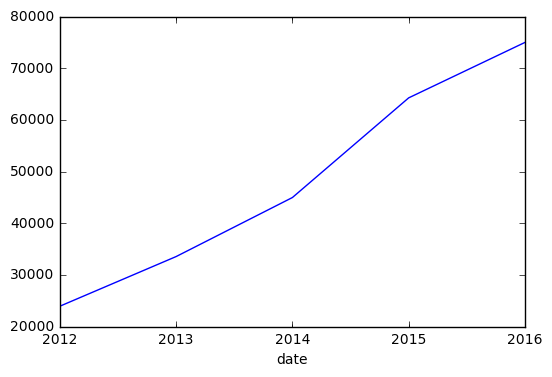

In [9]:
by_year.plot()

## Category publications by year

In [10]:
df.groupby([pd.TimeGrouper('A'),'category']).count()['title']

date        category  
2012-12-31  government     7480
            hollywood      2940
            journalism     1960
            natsec         3560
            sports           10
            videos         7985
2013-12-31  government    10389
            hollywood      2159
            jerusalem         3
            journalism     2890
            natsec         5074
            sports         5382
            texas             3
            videos         7642
2014-12-31  california     3109
            government    10436
            hollywood      1503
            jerusalem      2583
            journalism     1340
            london         6080
            natsec         7265
            race2016         79
            sports         3716
            texas          2584
            videos         6271
2015-12-31  california     3671
            government    15444
            hollywood      2143
            jerusalem      2679
            journalism     2242
            londo

### Top 25 authors

In [12]:
df.groupby(['author']).count()['title'].sort_values(ascending=0).head(25)

author
Breitbart News               25136
Breitbart TV                 22899
AWR Hawkins                   7987
Ian Hanchett                  6920
Pam Key                       6685
Joel B. Pollak                6353
Tony Lee                      5901
William Bigelow               5177
Charlie Spiering              5082
Warner Todd Huston            4544
Alex Swoyer                   4503
John Nolte                    4406
John Hayward                  3886
Breitbart London              3812
Bob Price                     3664
Mary Chastain                 3388
Frances Martel                3316
Trent Baker                   3288
Dr. Susan Berry               3267
Matthew Boyle                 3220
Jeff Poor                     2933
Thomas D. Williams, Ph.D.     2720
Adelle Nazarian               2586
Daniel Nussbaum               2584
Ildefonso Ortiz               2569
Name: title, dtype: int64

### Hacky attempt to explore most common top level domains linked in articles

In [14]:
from collections import Counter
tld_counter = Counter()

In [15]:
def get_tld(hrefs):
    
    # Quick and dirty, not thorough yet
    for link in ast.literal_eval(hrefs):
        top_level = tldextract.extract(link)
        top_level = top_level.domain
        tld_counter[top_level] += 1

In [16]:
_ = df[['hrefs']].applymap(get_tld)

In [17]:
tld_counter.most_common(25)

[('twitter', 386204),
 ('breitbart', 367776),
 ('t', 64162),
 ('facebook', 25930),
 ('nytimes', 23036),
 ('amazon', 22010),
 ('washingtonpost', 21836),
 ('politico', 17172),
 ('cnn', 17096),
 ('reuters', 16230),
 ('youtube', 14850),
 ('wsj', 12216),
 ('foxnews', 12146),
 ('dailymail', 11914),
 ('go', 11774),
 ('GenerationalDynamics', 11082),
 ('theguardian', 10556),
 ('thehill', 10350),
 ('latimes', 10304),
 ('bbc', 9502),
 ('google', 8682),
 ('telegraph', 8568),
 ('huffingtonpost', 8288),
 ('state', 7994),
 ('scribd', 7514)]

In [1]:
import pandas as pd